(900, 1600, 3)


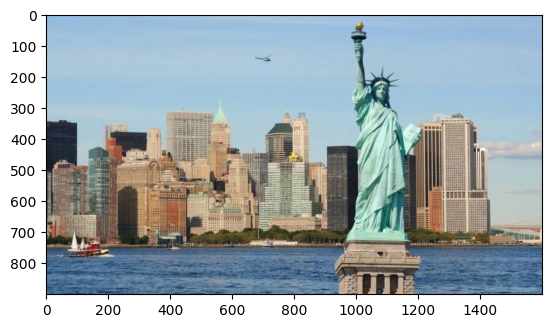

In [20]:
# Знаходження вектора\
from matplotlib.image import imread
import matplotlib.pyplot as plt

img = imread("statue.jpg")
print(img.shape)
plt.imshow(img)

(900, 1600)


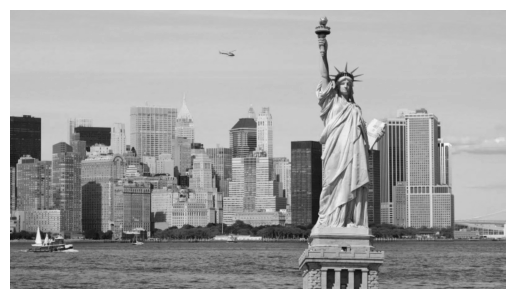

2) Amount of components to cover 95%: 40


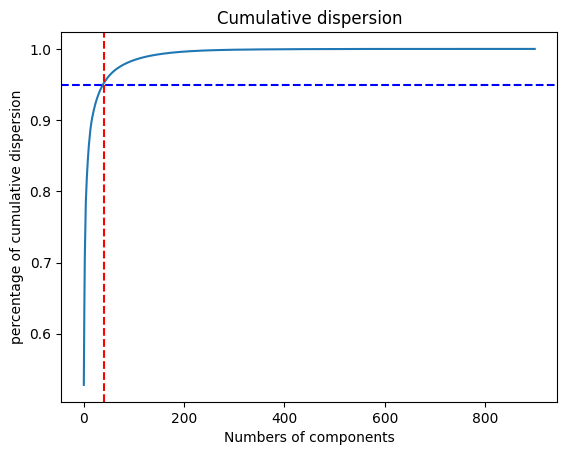

In [22]:
import numpy as np
from sklearn.decomposition import PCA


image_sum = img.sum(axis=2)
image_bw = image_sum / image_sum.max()
print(image_bw.shape)

plt.imshow(image_bw, cmap='gray')
plt.axis('off')
plt.show()

pca = PCA()
pca.fit(image_bw)

# рахуємо дисперсію
cum_dispersion = np.cumsum(pca.explained_variance_ratio_)

# amount of components needed to cover 95% of dispersion
number_comp95 = np.argmax(cum_dispersion >= 0.95) + 1
print(number_comp95)

# Grafh results
plt.plot(cum_dispersion)
plt.xlabel("Numbers of components")
plt.ylabel("percentage of cumulative dispersion")

plt.title("Cumulative dispersion")

plt.axvline(number_comp95, color='r', linestyle='--')
plt.axhline(y=0.95, color='b', linestyle='--')
plt.show()

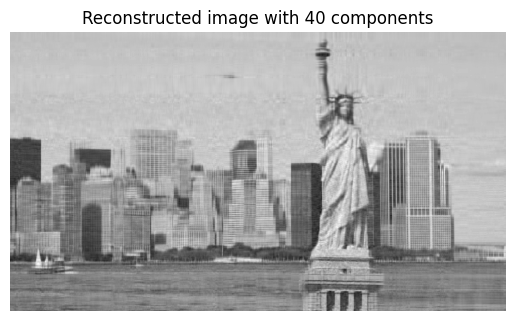

In [23]:
# реконструкція зображення 
components_amount = number_comp95
pca = PCA(n_components=components_amount)
im_bw_pca = pca.fit_transform(image_bw)
reconstructed_im = pca.inverse_transform(im_bw_pca) 

plt.imshow(reconstructed_im, cmap='gray')
plt.title(f"Reconstructed image with {components_amount} components")
plt.axis("off")
plt.show()

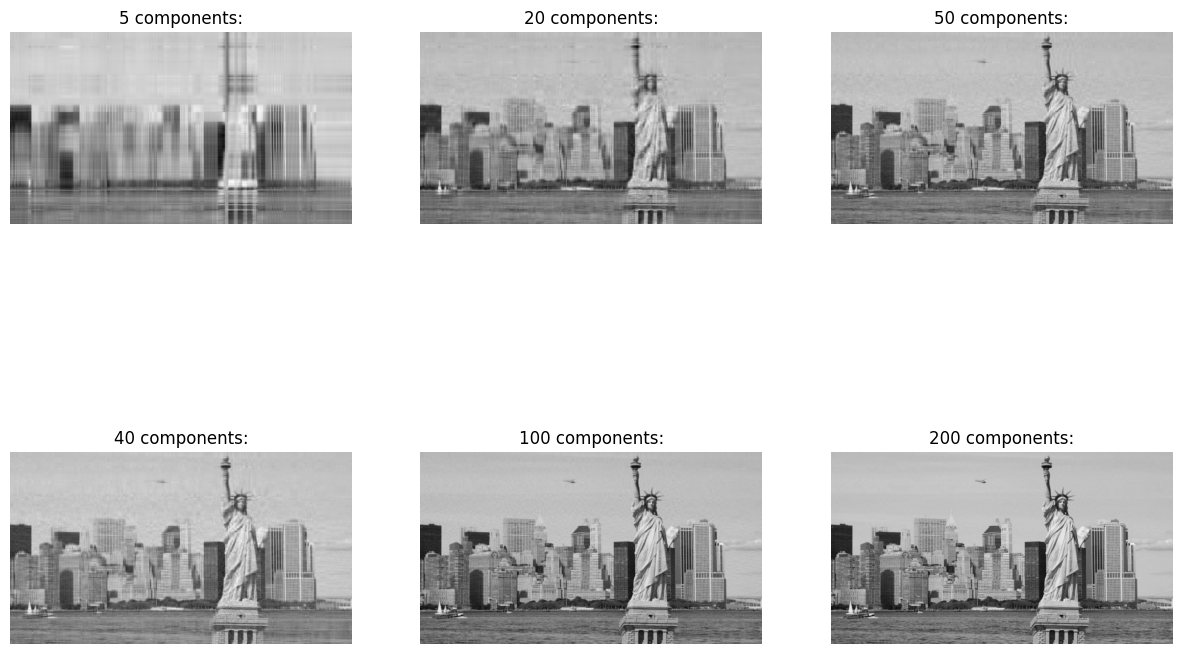

In [24]:
def reconstruct_image(image, comp_am):
    pca = PCA(n_components=comp_am)
    image_bw_pca = pca.fit_transform(image)
    reconstructed_image = pca.inverse_transform(image_bw_pca)
    return reconstructed_image

def plot_all():
    components_list = [5, 20, 50,components_amount, 100, 200]

    plt.figure(figsize=(15, 10))
    for i, comp_am in enumerate(components_list):
        plt.subplot(2, 3, i+1)
        image_reconstructed = reconstruct_image(image_bw, comp_am)
        plt.imshow(image_reconstructed, cmap='gray')
        plt.title(f"{comp_am} components:")
        plt.axis('off')

    plt.show()

plot_all()